In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
Games_df = pd.read_csv('./Data/with_ratingvotes.csv')

# Display the first few rows
print(Games_df.head())

                         name    year  rating    votes  Action  Adventure  \
0                  Spider-Man  2018.0     9.2  20759.0    True       True   
1      Red Dead Redemption II  2018.0     9.7  35703.0    True       True   
2          Grand Theft Auto V  2013.0     9.5  59986.0    True      False   
3                  God of War  2018.0     9.6  26118.0    True       True   
4  Uncharted 4: A Thief's End  2016.0     9.5  28722.0    True       True   

   Comedy  Crime  Family  Fantasy  Mystery  Sci-Fi  Thriller  
0   False  False   False     True    False   False     False  
1   False   True   False    False    False   False     False  
2   False   True   False    False    False   False     False  
3   False  False   False    False    False   False     False  
4   False  False   False    False    False   False     False  


In [3]:
# Select only the numerical features
numerical_features = Games_df[['year', 'rating', 'votes']]

# Scale the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Create a new DataFrame to hold the scaled data
scaled_df = pd.DataFrame(scaled_features, columns=['year', 'rating', 'votes'])

# Combine the scaled data with the other features
features = pd.concat([scaled_df, Games_df.iloc[:, 4:]], axis=1)

# For later use
features2 = features.copy()

print(features.head())

       year    rating      votes  Action  Adventure  Comedy  Crime  Family  \
0  1.237662  1.786600  10.508353    True       True   False  False   False   
1  1.237662  2.193520  18.233426    True       True   False   True   False   
2  0.767496  2.030752  30.786153    True      False   False   True   False   
3  1.237662  2.112136  13.278606    True       True   False  False   False   
4  1.049596  2.030752  14.624704    True       True   False  False   False   

   Fantasy  Mystery  Sci-Fi  Thriller  
0     True    False   False     False  
1    False    False   False     False  
2    False    False   False     False  
3    False    False   False     False  
4    False    False   False     False  


In [4]:
# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to your data
dbscan.fit(features)

# Get the cluster labels for each sample
labels = dbscan.labels_

In [5]:
# Get the labels (cluster IDs) for each point
labels = dbscan.labels_

# Count unique labels (excluding noise if present)
n_clusters = len(np.unique(labels[labels != -1]))

print(f"Number of clusters: {n_clusters}")


Number of clusters: 84


In [34]:
# Create a new DataFrame for storing results
Games_df_84 = Games_df.copy()

# Add these labels to your DataFrame
Games_df_84['Cluster'] = labels

Games_df_84.head(10)

,name,year,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,Cluster
0,Spider-Man,2018.0,9.2,20759.0,True,True,False,False,False,True,False,False,False,-1
1,Red Dead Redemption II,2018.0,9.7,35703.0,True,True,False,True,False,False,False,False,False,-1
2,Grand Theft Auto V,2013.0,9.5,59986.0,True,False,False,True,False,False,False,False,False,-1
3,God of War,2018.0,9.6,26118.0,True,True,False,False,False,False,False,False,False,-1
4,Uncharted 4: A Thief's End,2016.0,9.5,28722.0,True,True,False,False,False,False,False,False,False,-1
5,The Last of Us: Part II,2020.0,8.5,30460.0,True,True,False,False,False,False,False,False,False,-1
6,Horizon Forbidden West,2022.0,9.2,2979.0,True,True,False,False,False,False,True,False,False,-1
7,The Last of Us,2013.0,9.7,60590.0,True,True,False,False,False,False,False,False,False,-1
8,Detroit: Become Human,2018.0,9.2,16907.0,True,True,False,False,False,False,False,False,False,-1
9,Death Stranding,2019.0,8.8,8136.0,True,True,False,False,False,False,False,False,False,-1


In [35]:
# Add 1 to labels temporarily for counting purpose
labels_temp = labels + 1

# Count the occurrences of each cluster ID
counts = np.bincount(labels_temp)

for cluster_id, count in enumerate(counts):
    print(f"Cluster ID {cluster_id - 1} : {count} rows")

Cluster ID -1 : 1267 rows
Cluster ID 0 : 1245 rows
Cluster ID 1 : 403 rows
Cluster ID 2 : 952 rows
Cluster ID 3 : 241 rows
Cluster ID 4 : 1415 rows
Cluster ID 5 : 13 rows
Cluster ID 6 : 467 rows
Cluster ID 7 : 127 rows
Cluster ID 8 : 631 rows
Cluster ID 9 : 394 rows
Cluster ID 10 : 25 rows
Cluster ID 11 : 31 rows
Cluster ID 12 : 103 rows
Cluster ID 13 : 94 rows
Cluster ID 14 : 5 rows
Cluster ID 15 : 3 rows
Cluster ID 16 : 68 rows
Cluster ID 17 : 43 rows
Cluster ID 18 : 10 rows
Cluster ID 19 : 89 rows
Cluster ID 20 : 52 rows
Cluster ID 21 : 11 rows
Cluster ID 22 : 5 rows
Cluster ID 23 : 30 rows
Cluster ID 24 : 11 rows
Cluster ID 25 : 6 rows
Cluster ID 26 : 6 rows
Cluster ID 27 : 11 rows
Cluster ID 28 : 5 rows
Cluster ID 29 : 5 rows
Cluster ID 30 : 7 rows
Cluster ID 31 : 6 rows
Cluster ID 32 : 4 rows
Cluster ID 33 : 6 rows
Cluster ID 34 : 7 rows
Cluster ID 35 : 7 rows
Cluster ID 36 : 3 rows
Cluster ID 37 : 6 rows
Cluster ID 38 : 795 rows
Cluster ID 39 : 52 rows
Cluster ID 40 : 267 rows
C

This might be a little hard to read so next we look at top 10 and bottom 10.

In [36]:
# Add 1 to labels temporarily for counting purpose
labels_temp = labels + 1

# Count the occurrences of each cluster ID
counts = np.bincount(labels_temp)

# Create a list of tuples [(cluster_id, count), ...]
cluster_counts = [(cluster_id - 1, count) for cluster_id, count in enumerate(counts)]

# Sort the list in descending order based on the count
cluster_counts_sorted = sorted(cluster_counts, key=lambda x: x[1], reverse=True)

print("First 10 clusters:")
for cluster_id, count in cluster_counts_sorted[:10]:  # First 10
    print(f"Cluster ID {cluster_id} : {count} rows")

print("\nLast 10 clusters:")
for cluster_id, count in cluster_counts_sorted[-10:]:  # Last 10
    print(f"Cluster ID {cluster_id} : {count} rows")


First 10 clusters:
Cluster ID 4 : 1415 rows
Cluster ID -1 : 1267 rows
Cluster ID 0 : 1245 rows
Cluster ID 2 : 952 rows
Cluster ID 38 : 795 rows
Cluster ID 8 : 631 rows
Cluster ID 6 : 467 rows
Cluster ID 73 : 423 rows
Cluster ID 1 : 403 rows
Cluster ID 9 : 394 rows

Last 10 clusters:
Cluster ID 67 : 5 rows
Cluster ID 69 : 5 rows
Cluster ID 70 : 5 rows
Cluster ID 77 : 5 rows
Cluster ID 78 : 5 rows
Cluster ID 32 : 4 rows
Cluster ID 57 : 4 rows
Cluster ID 64 : 4 rows
Cluster ID 15 : 3 rows
Cluster ID 36 : 3 rows


We now have a cluster column with our data.  Now what?  What are we trying to do...

**GPT suggested notes to consider:**

Clustering is an unsupervised learning method, so the meaning and interpretation of the clusters largely depend on the problem domain and the specific dataset. Here are a few possible interpretations:

**Outliers and Noise:** The '-1' label is assigned to noise by the DBSCAN algorithm. If a large number of instances are labeled as '-1', it might mean that your eps and min_samples parameters need to be adjusted, or it could be that there's a large amount of variability in your data that the algorithm is interpreting as noise.

**Cluster Sizes:** The varying sizes of the clusters could indicate different levels of generality in your data. Larger clusters might represent more general or popular combinations of features (e.g., commonly seen genres, popular release years), while smaller clusters could represent more niche or unusual combinations.

**Genre Patterns:** If the clusters were primarily based on genre, you might find that the clusters represent common combinations of genres. For example, you might find that certain genres often appear together in the same game, and the clusters might represent these common combinations.

**Year, Rating, and Voting Influence:** Clustering on these variables along with genre might lead to clusters that represent different trends over time, different levels of game quality, or different levels of community engagement. For instance, there might be clusters of high-rated, highly-voted recent games in popular genres, and other clusters of low-rated older games.

Remember that these are just potential interpretations. The real meaning of the clusters can often only be understood by combining the clustering results with your domain knowledge about the data

In [38]:
# Calculate cluster sizes
cluster_sizes = Games_df_84[Games_df_84['Cluster'] != -1]['Cluster'].value_counts()

# Sort cluster sizes in descending order and get the sorted indices
sorted_indices = cluster_sizes.sort_values(ascending=False).index

# Compute cluster statistics and rearrange them according to the sorted indices
cluster_stats = Games_df_84[Games_df_84['Cluster'] != -1].groupby('Cluster')[['year', 'rating', 'votes']].mean().loc[sorted_indices]

# Convert cluster_sizes into a DataFrame
cluster_sizes_df = cluster_sizes.reset_index()
cluster_sizes_df.columns = ['Cluster', 'Size']

# Set 'Cluster' as the index in cluster_sizes_df for joining with cluster_stats
cluster_sizes_df.set_index('Cluster', inplace=True)

# Join the dataframes
cluster_stats = cluster_stats.join(cluster_sizes_df)

print(cluster_stats)


           year    rating        votes  Size
4   2004.833922  6.679364    73.900353  1415
0   2006.678715  7.328112   432.899598  1245
2   2005.571429  7.153256   206.735294   952
38  2008.364780  7.009308    55.864151   795
8   1996.556260  6.577496   130.095087   631
..          ...       ...          ...   ...
32  1995.000000  2.000000    29.750000     4
64  2001.000000  4.475000    22.750000     4
57  2018.750000  5.350000    86.500000     4
15  2008.333333  8.266667  2086.333333     3
36  2003.666667  2.833333    10.000000     3

[84 rows x 4 columns]


In [37]:
cluster_stats = Games_df_84[Games_df_84['Cluster'] != -1].groupby('Cluster')[['year', 'rating', 'votes']].agg(['mean', 'std', 'min', 'max'])
print(cluster_stats)


                year                               rating                      \
                mean        std     min     max      mean       std  min  max   
Cluster                                                                         
0        2006.678715   9.755924  1981.0  2022.0  7.328112  1.036332  2.7  9.6   
1        2007.828784   8.442546  1985.0  2022.0  7.238213  0.979861  4.2  9.2   
2        2005.571429   9.363842  1977.0  2022.0  7.153256  0.973006  3.3  9.4   
3        2002.576763  11.056829  1980.0  2022.0  7.021162  0.888121  4.9  8.7   
4        2004.833922  10.503248  1970.0  2022.0  6.679364  1.239507  1.6  9.2   
...              ...        ...     ...     ...       ...       ...  ...  ...   
79       2014.329545   4.728786  2001.0  2022.0  7.511364  0.825656  5.4  8.8   
80       2012.937500   5.645081  2003.0  2021.0  7.187500  0.852983  5.3  8.7   
81       2006.311558  10.293835  1984.0  2022.0  7.060804  0.922486  4.5  8.8   
82       2017.153846   1.772

DBSCAN works best when you have dense regions of points separated by regions of low density.  If DBSCAN is appropriate for the data, we might want to adjust our eps and min_samples parameters. A good way to start is by looking at a histogram or KDE plot of the pairwise distances in the dataset to help guide the choice of eps.

The process of looking at a histogram plot of pairwise distances involves calculating the distance between each pair of points in the dataset, and then plotting a histogram.  We will use the pdist function from the scipy.spatial.distance module, which computes the pairwise distances, and matplotlib to plot the histogram. As suggested by GPT. 

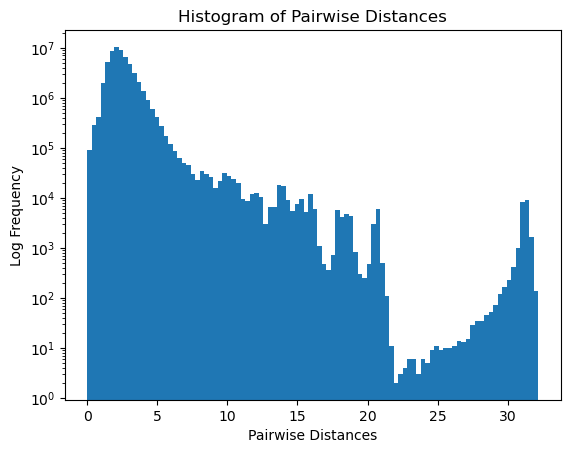

In [11]:
from scipy.spatial.distance import pdist, squareform

# Convert only boolean columns to integers
bool_cols = features.select_dtypes(include=[bool]).columns
features[bool_cols] = features[bool_cols].astype(int)

# Compute pairwise distances
distances = pdist(features.values)

# Plot histogram
plt.hist(distances, bins=100, log=True)  # The `log=True` makes the y-axis logarithmic
plt.title('Histogram of Pairwise Distances')
plt.xlabel('Pairwise Distances')
plt.ylabel('Log Frequency') 
plt.show()


Time to change the eps and min_sample sizes using the insight from the pdist historgram

In [39]:
# Pulling a copy of the features df that was created earlier in the code
print(features2.head())

       year    rating      votes  Action  Adventure  Comedy  Crime  Family  \
0  1.237662  1.786600  10.508353    True       True   False  False   False   
1  1.237662  2.193520  18.233426    True       True   False   True   False   
2  0.767496  2.030752  30.786153    True      False   False   True   False   
3  1.237662  2.112136  13.278606    True       True   False  False   False   
4  1.049596  2.030752  14.624704    True       True   False  False   False   

   Fantasy  Mystery  Sci-Fi  Thriller  
0     True    False   False     False  
1    False    False   False     False  
2    False    False   False     False  
3    False    False   False     False  
4    False    False   False     False  


In [40]:
# Create a DBSCAN model wid different eps and min_sample using a copy of features as features2
dbscan2 = DBSCAN(eps=0.75, min_samples=10)

# Fit the model to your data
dbscan2.fit(features2)

# Get the cluster labels for each sample
labels2 = dbscan2.labels_

We originally ran the model with eps at 2.5 and a general guess of a min sample 12.  This generated 1 cluster.  Unfourntaly, either the Pairwise chart is off-scale or did not produce a good number for eps.  Good exercise, in any case.  So gently increased the eps to 0.75 and the min sample to 10 to create a second clustering result. 

In [41]:
# Count unique labels (excluding noise if present)
n_clusters = len(np.unique(labels2[labels2 != -1]))

print(f"Number of clusters: {n_clusters}")


Number of clusters: 47


In [44]:
# Create a new DataFrame for storing results
Games_df_47 = Games_df.copy()

# Add these labels to your DataFrame
Games_df_47['Cluster'] = labels2

Games_df_47.head(10)

,name,year,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,Cluster
0,Spider-Man,2018.0,9.2,20759.0,True,True,False,False,False,True,False,False,False,-1
1,Red Dead Redemption II,2018.0,9.7,35703.0,True,True,False,True,False,False,False,False,False,-1
2,Grand Theft Auto V,2013.0,9.5,59986.0,True,False,False,True,False,False,False,False,False,-1
3,God of War,2018.0,9.6,26118.0,True,True,False,False,False,False,False,False,False,-1
4,Uncharted 4: A Thief's End,2016.0,9.5,28722.0,True,True,False,False,False,False,False,False,False,-1
5,The Last of Us: Part II,2020.0,8.5,30460.0,True,True,False,False,False,False,False,False,False,-1
6,Horizon Forbidden West,2022.0,9.2,2979.0,True,True,False,False,False,False,True,False,False,-1
7,The Last of Us,2013.0,9.7,60590.0,True,True,False,False,False,False,False,False,False,-1
8,Detroit: Become Human,2018.0,9.2,16907.0,True,True,False,False,False,False,False,False,False,-1
9,Death Stranding,2019.0,8.8,8136.0,True,True,False,False,False,False,False,False,False,-1


In [45]:
# Add 1 to labels temporarily for counting purpose
labels_temp = labels2 + 1

# Count the occurrences of each cluster ID
counts = np.bincount(labels_temp)

# Create a list of tuples [(cluster_id, count), ...]
cluster_counts = [(cluster_id - 1, count) for cluster_id, count in enumerate(counts)]

# Sort the list in descending order based on the count
cluster_counts_sorted = sorted(cluster_counts, key=lambda x: x[1], reverse=True)

print("First 10 clusters:")
for cluster_id, count in cluster_counts_sorted[:10]:  # First 10
    print(f"Cluster ID {cluster_id} : {count} rows")

print("\nLast 10 clusters:")
for cluster_id, count in cluster_counts_sorted[-10:]:  # Last 10
    print(f"Cluster ID {cluster_id} : {count} rows")


First 10 clusters:
Cluster ID 6 : 1419 rows
Cluster ID 1 : 1263 rows
Cluster ID -1 : 1148 rows
Cluster ID 4 : 984 rows
Cluster ID 21 : 796 rows
Cluster ID 2 : 642 rows
Cluster ID 7 : 478 rows
Cluster ID 39 : 427 rows
Cluster ID 3 : 410 rows
Cluster ID 11 : 406 rows

Last 10 clusters:
Cluster ID 30 : 20 rows
Cluster ID 37 : 20 rows
Cluster ID 20 : 18 rows
Cluster ID 45 : 15 rows
Cluster ID 34 : 14 rows
Cluster ID 16 : 13 rows
Cluster ID 40 : 13 rows
Cluster ID 32 : 12 rows
Cluster ID 38 : 11 rows
Cluster ID 35 : 7 rows


In [46]:
cluster_stats = Games_df_47[Games_df_47['Cluster'] != -1].groupby('Cluster')[['year', 'rating', 'votes']].agg(['mean', 'std', 'min', 'max'])
print(cluster_stats)


                year                               rating                      \
                mean        std     min     max      mean       std  min  max   
Cluster                                                                         
0        2005.166667   9.591749  1980.0  2022.0  7.147059  0.765041  5.5  8.6   
1        2006.689628   9.743393  1981.0  2022.0  7.337846  1.057840  2.7  9.6   
2        1996.725857  11.808518  1971.0  2021.0  6.565732  1.187182  3.0  8.8   
3        2007.821951   8.510601  1983.0  2022.0  7.204390  1.023647  3.8  9.2   
4        2005.782520   9.344838  1977.0  2022.0  7.138008  1.042631  3.0  9.5   
5        2006.675862   9.288496  1986.0  2022.0  7.199310  0.904349  4.6  9.2   
6        2004.832981  10.532220  1970.0  2022.0  6.678717  1.238617  1.6  9.2   
7        2003.198745   9.871939  1981.0  2022.0  7.148745  0.949362  3.8  9.3   
8        2002.520325  11.090242  1980.0  2022.0  7.027642  0.902948  4.6  8.7   
9        2004.517544   8.729

In [47]:
# Calculate cluster sizes
cluster_sizes = Games_df_47[Games_df_47['Cluster'] != -1]['Cluster'].value_counts()

# Sort cluster sizes in descending order and get the sorted indices
sorted_indices = cluster_sizes.sort_values(ascending=False).index

# Compute cluster statistics and rearrange them according to the sorted indices
cluster_stats = Games_df_47[Games_df_47['Cluster'] != -1].groupby('Cluster')[['year', 'rating', 'votes']].agg(['mean', 'std', 'min', 'max']).loc[sorted_indices]

# Convert cluster_sizes into a DataFrame
cluster_sizes_df = cluster_sizes.reset_index()
cluster_sizes_df.columns = ['Cluster', 'Size']

# Set 'Cluster' as the index in cluster_sizes_df for joining with cluster_stats
cluster_sizes_df.set_index('Cluster', inplace=True)

# Join the dataframes
cluster_stats = cluster_stats.join(cluster_sizes_df)

print(cluster_stats)


    (year, mean)  (year, std)  (year, min)  (year, max)  (rating, mean)  \
6    2004.832981    10.532220       1970.0       2022.0        6.678717   
1    2006.689628     9.743393       1981.0       2022.0        7.337846   
4    2005.782520     9.344838       1977.0       2022.0        7.138008   
21   2008.375628     9.880970       1979.0       2022.0        7.010804   
2    1996.725857    11.808518       1971.0       2021.0        6.565732   
7    2003.198745     9.871939       1981.0       2022.0        7.148745   
39   1998.257611    11.853137       1972.0       2022.0        6.292037   
3    2007.821951     8.510601       1983.0       2022.0        7.204390   
11   2004.332512     9.490490       1981.0       2022.0        7.105419   
23   2002.851852    11.774851       1976.0       2022.0        7.502963   
8    2002.520325    11.090242       1980.0       2022.0        7.027642   
41   2007.710084     8.939788       1983.0       2022.0        7.023529   
44   2006.226601    10.44

C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_21476\1494416659.py:18: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  cluster_stats = cluster_stats.join(cluster_sizes_df)


In [48]:
# Compute the mean of each cluster
cluster_centers = Games_df_47.groupby('Cluster').mean()

print(cluster_centers)


                year    rating        votes    Action  Adventure    Comedy  \
Cluster                                                                      
-1       2004.576655  6.733188  2218.906794  0.520035    0.41899  0.205575   
 0       2005.166667  7.147059   186.196078  1.000000    0.00000  0.000000   
 1       2006.689628  7.337846   478.353919  1.000000    1.00000  0.000000   
 2       1996.725857  6.565732   147.735202  1.000000    0.00000  0.000000   
 3       2007.821951  7.204390   292.773171  1.000000    1.00000  1.000000   
 4       2005.782520  7.138008   283.421748  1.000000    1.00000  0.000000   
 5       2006.675862  7.199310   566.737931  1.000000    1.00000  0.000000   
 6       2004.832981  6.678717    77.063425  1.000000    0.00000  0.000000   
 7       2003.198745  7.148745   261.903766  1.000000    1.00000  0.000000   
 8       2002.520325  7.027642   152.353659  1.000000    0.00000  0.000000   
 9       2004.517544  7.272807   436.614035  1.000000    0.00000

C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_21476\3324165154.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_centers = Games_df_47.groupby('Cluster').mean()


That seems to be quite a few clusters.  Can we use PCA after the DBSCAN ML process and maybe try to visualize what we have?  We pulled in PCA and emulated what we did with the Kmeans notebook. 

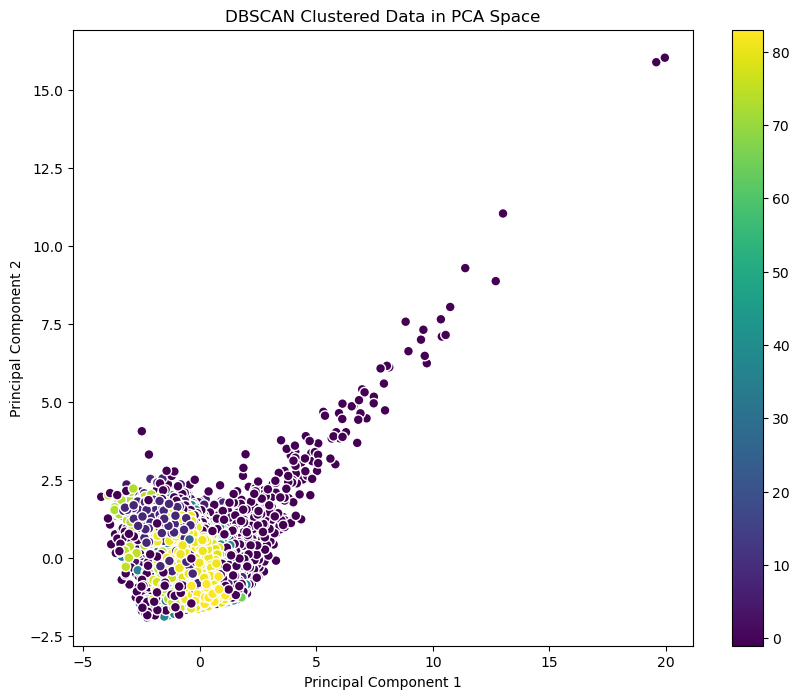

In [29]:
from sklearn.decomposition import PCA

# 1. Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(features)

# 2. Perform PCA for visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)

# Convert to a dataframe for easier plotting
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf['Cluster'] = labels

# 3. Visualize in reduced space
plt.figure(figsize=(10,8))
scatter = plt.scatter(principalDf['PC1'], principalDf['PC2'], c=principalDf['Cluster'], cmap='viridis', s=50, edgecolors='w')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustered Data in PCA Space')
plt.colorbar(scatter)
plt.show()



Almost expected.  We get a giant blob because we are trying to "smash" 84 clusters into a two-dimensional space.  Unlike the Kmeans chart, we don't get a clear picture of all clusters.  Nevertheless, what we do see are two things.  The purple cluster seems to incorporate most of the "stragglers," and "most" of the data is in that blob in the bottom left of the chart. 

In [30]:
# Get the feature loadings
loadings = pca.components_

# Create a dataframe that contains the loadings
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=features.columns)

# Print the dataframe
print(loadings_df)

                PC1       PC2
year       0.465075 -0.834400
rating     0.655379  0.133012
votes      0.582258  0.526799
Action     0.016523  0.057349
Adventure  0.097744 -0.031862
Comedy     0.009656 -0.018844
Crime      0.018099  0.010919
Family    -0.047837  0.030518
Fantasy    0.033817 -0.007413
Mystery    0.017356 -0.014240
Sci-Fi    -0.033344  0.050573
Thriller   0.008126 -0.006500


The table shows that PC1 is most influenced by year, rating, and votes.  PC2 is votes, ratings, and maybe family.  Again, smashing 84 clusters into primary components might not tell too much.  We can see that year is a big factor for the variance of PC1 and a tiny factor for PC2.  That could tell us something...maybe. 

In [31]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance: ", explained_variance)

Explained Variance:  [0.31787909 0.22672857]


This time, reducing it to two principal components accounts for about 54% of the variance.  This is better than the Kmeans attempt but still nowhere near 95%, which would be a good representation.   
Let us see how many PCAs it would take to explain best without using the same number of PCA as the original features.

In [32]:
pca = PCA()
principalComponents = pca.fit_transform(features)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.where(explained_variance > 0.95)[0][0] + 1

print(f"To explain 95% of variance we need {num_components} principal components.")

To explain 95% of variance we need 8 principal components.


Eight is quite a few less than 84, so maybe a PCA could help "simplify" the data, but to make a visualization out of it might not be any better than the raw model. Anything more than 2 or 3 PCA as dimensions is above human comprehension.

Back to more analysis maybe get something close to what we did with the KMeans.

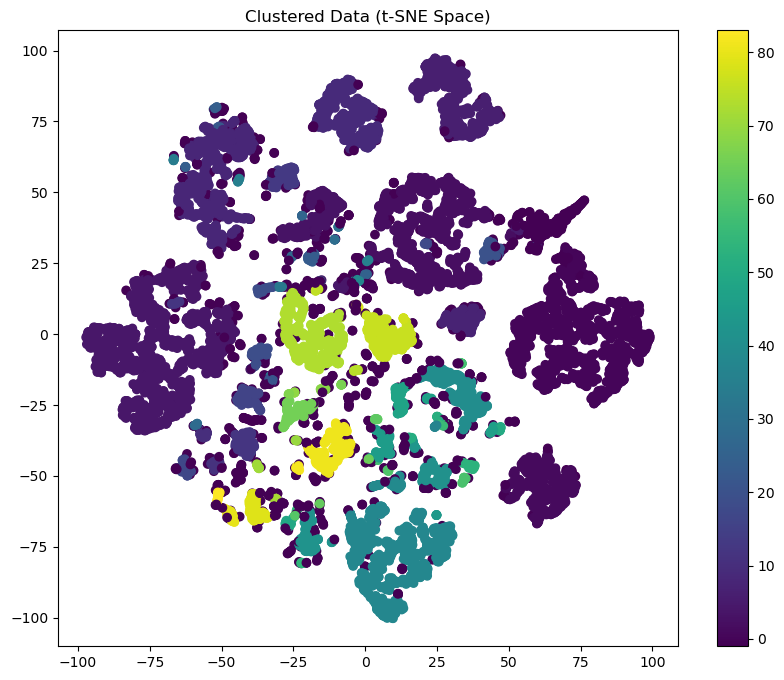

In [51]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(features)

# Plot the t-SNE results with cluster labels
plt.figure(figsize=(10,8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=Games_df_84['Cluster'], cmap='viridis')
plt.title('Clustered Data (t-SNE Space)')
plt.colorbar(scatter)
plt.show()


We will use t-SNE (t-distributed Stochastic Neighbor Embedding), which is really good at dimensionality reduction and well-suited for the visualization of our high-dimensional datasets.  That said, we should interpret the results carefully because distances between clusters in the t-SNE plot might not always reflect their relationships in the original high-dimensional space, but it sure makes a pretty chart and shows distinction in our groups. However, it is still hard to tell that there are 84 clusters. 

Can we look at patters over time usig our DBSCAN data set.  Let try. 

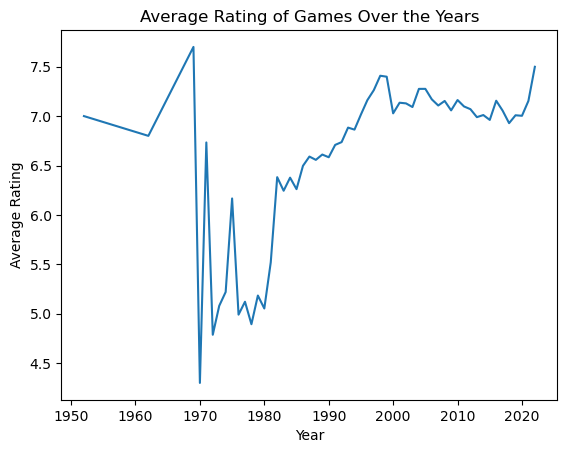

In [54]:
Games_df_84.groupby('year')['rating'].mean().plot(kind='line')
plt.title('Average Rating of Games Over the Years')
plt.ylabel('Average Rating')
plt.xlabel('Year')
plt.show()

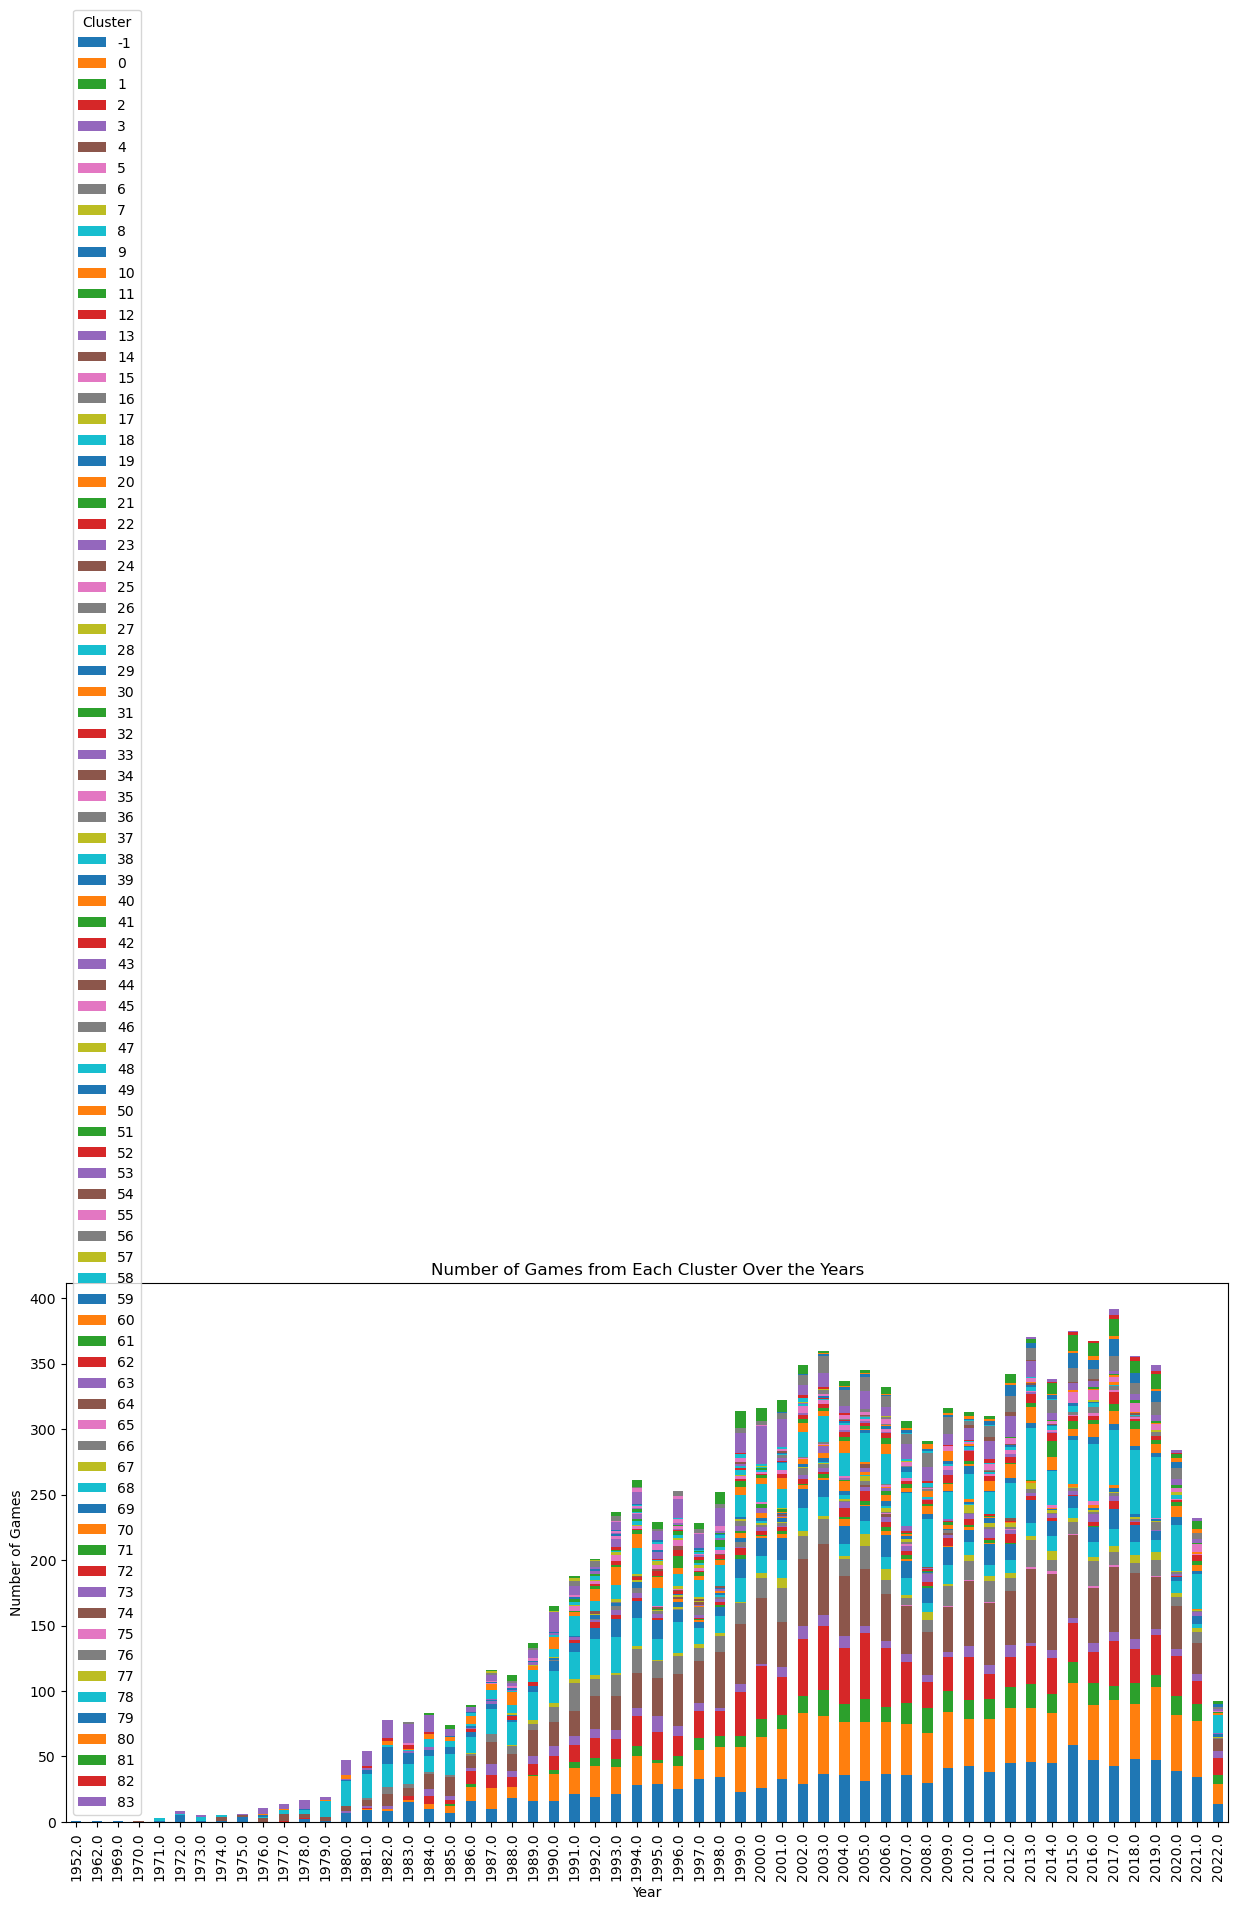

In [55]:
Games_df_84.groupby(['year', 'Cluster']).size().unstack().plot(kind='bar', stacked=True, figsize=(15,7))
plt.title('Number of Games from Each Cluster Over the Years')
plt.ylabel('Number of Games')
plt.xlabel('Year')
plt.show()

Way to messy hard to read. We will try a couple of different visualzatoin to get the jest of looking at everything.

First lets just look at the top 10.

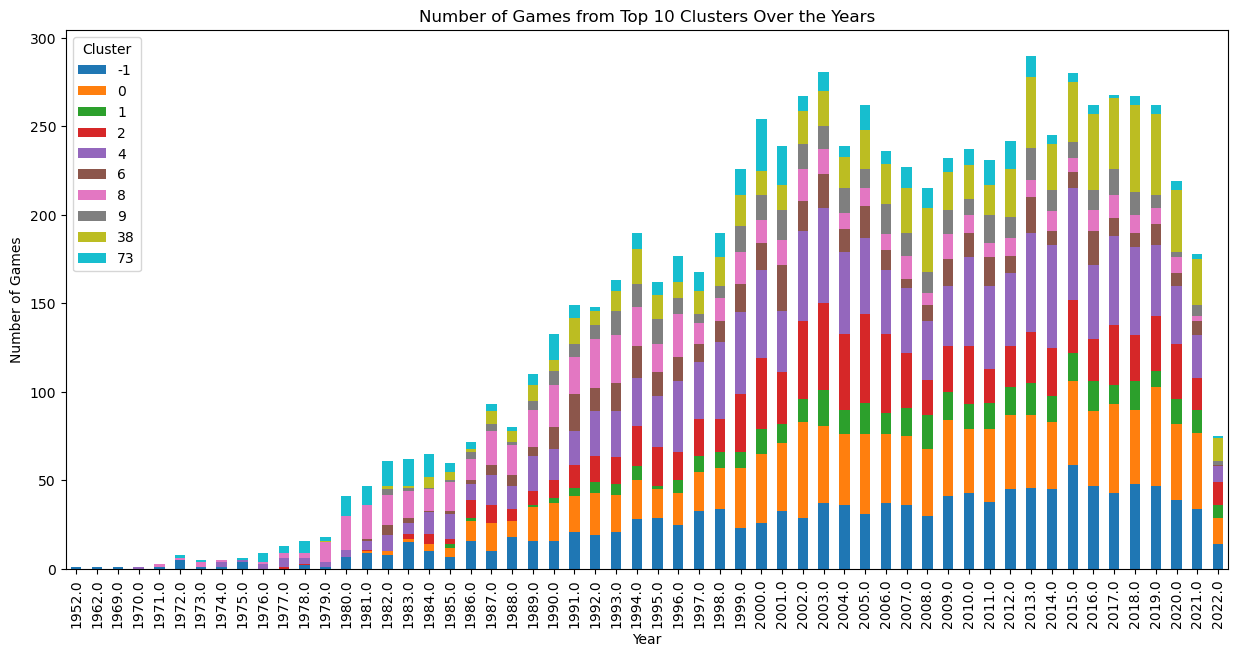

In [56]:
# First determine the top N clusters by size
N = 10  # You can adjust this value based on your preference
top_clusters = Games_df_84['Cluster'].value_counts().index[:N]

# Filter the dataframe for only the top clusters
top_cluster_data = Games_df_84[Games_df_84['Cluster'].isin(top_clusters)]

# Group and plot
top_cluster_data.groupby(['year', 'Cluster']).size().unstack().plot(kind='bar', stacked=True, figsize=(15,7))
plt.title(f'Number of Games from Top {N} Clusters Over the Years')
plt.ylabel('Number of Games')
plt.xlabel('Year')
plt.show()
